In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats as stats
import seaborn as sns

train = pd.read_csv('train.csv')
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
# Inspect the shape of the train dataset
print("Number of columns: "+ str(train.shape[1]))
print("Number of rows: "+ str(train.shape[0]))

Number of columns: 81
Number of rows: 1460


# Missing values
First, I want to identify whether there are missing values based on the percentage of NaN values. If a colunm has any many missing values, I would drop that column.

In [79]:
missing_value = (train.isnull().sum())
print (missing_value.sort_values(ascending = False)

SyntaxError: unexpected EOF while parsing (<ipython-input-79-84c2c4a32687>, line 2)

As we can see, there are 19 columns with missing values. We will drop these columns.

In [9]:
# Drop the columns with missing values
train_drop = train.dropna(axis='columns')
print("Number of columns: "+ str(train_drop.shape[1]))
print("Number of rows: "+ str(train_drop.shape[0]))
train_drop.head(5)

Number of columns: 62
Number of rows: 1460


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Data cleanup
Among 62 features, there are features that correllate better with the sale price and thus, are important for downstream analyses. Here, we calculate the corralation of all variables salewith 

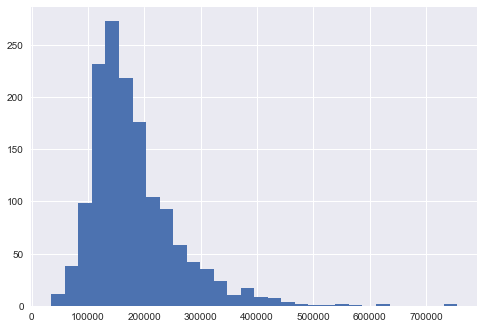

In [10]:
plt.hist(train_drop.SalePrice, bins = 30)
plt.show()

The distribution looks normal and skews towards lower-priced homes. We can perform log transformation to make the distribution looks more normal.

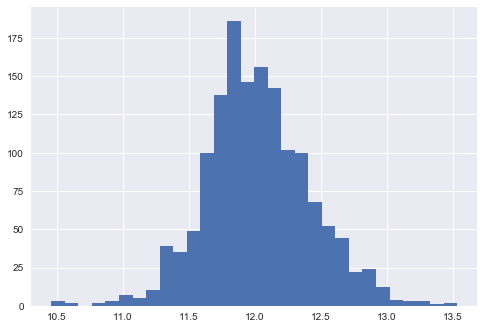

In [11]:
plt.hist(np.log(train_drop.SalePrice), bins = 30)
plt.show()

## Numerical variables

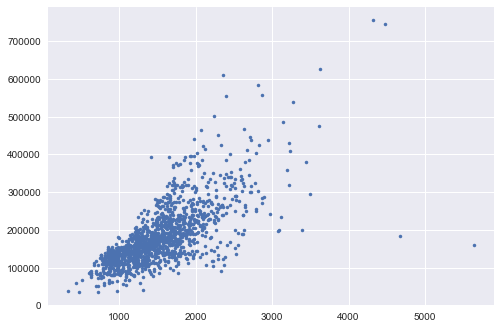

In [16]:
plt.plot(train_drop.GrLivArea, train_drop.SalePrice,'.')
plt.show()

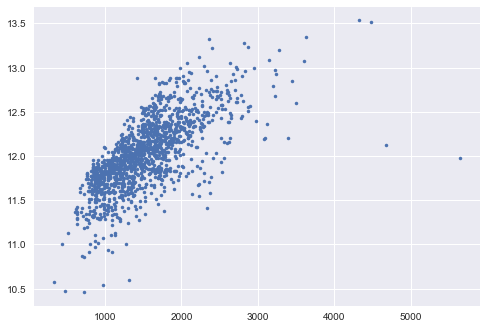

In [17]:
plt.plot(train_drop.GrLivArea, np.log(train_drop.SalePrice),'.')
plt.show()

# Data story

Ask the following questions and look for the answers using code and plots:

Can you count something interesting?
Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
Can you make a bar plot or a histogram?
Can you compare two related quantities?
Can you make a scatterplot?
Can you make a time-series plot?

Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

## Univariate analysis
Since the data sets have both numerical and categorical data, it makes sense to identify which is which.

In [82]:
def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = train_drop.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = train_drop.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

### Explore categorical features
In dealing with cateforical variables, bar plots are usually chosen in place of histograms.

Exploring a categorical feature of interest, HouseStyle, I notice that 1-story is the most popular style in Ames, Iowa.

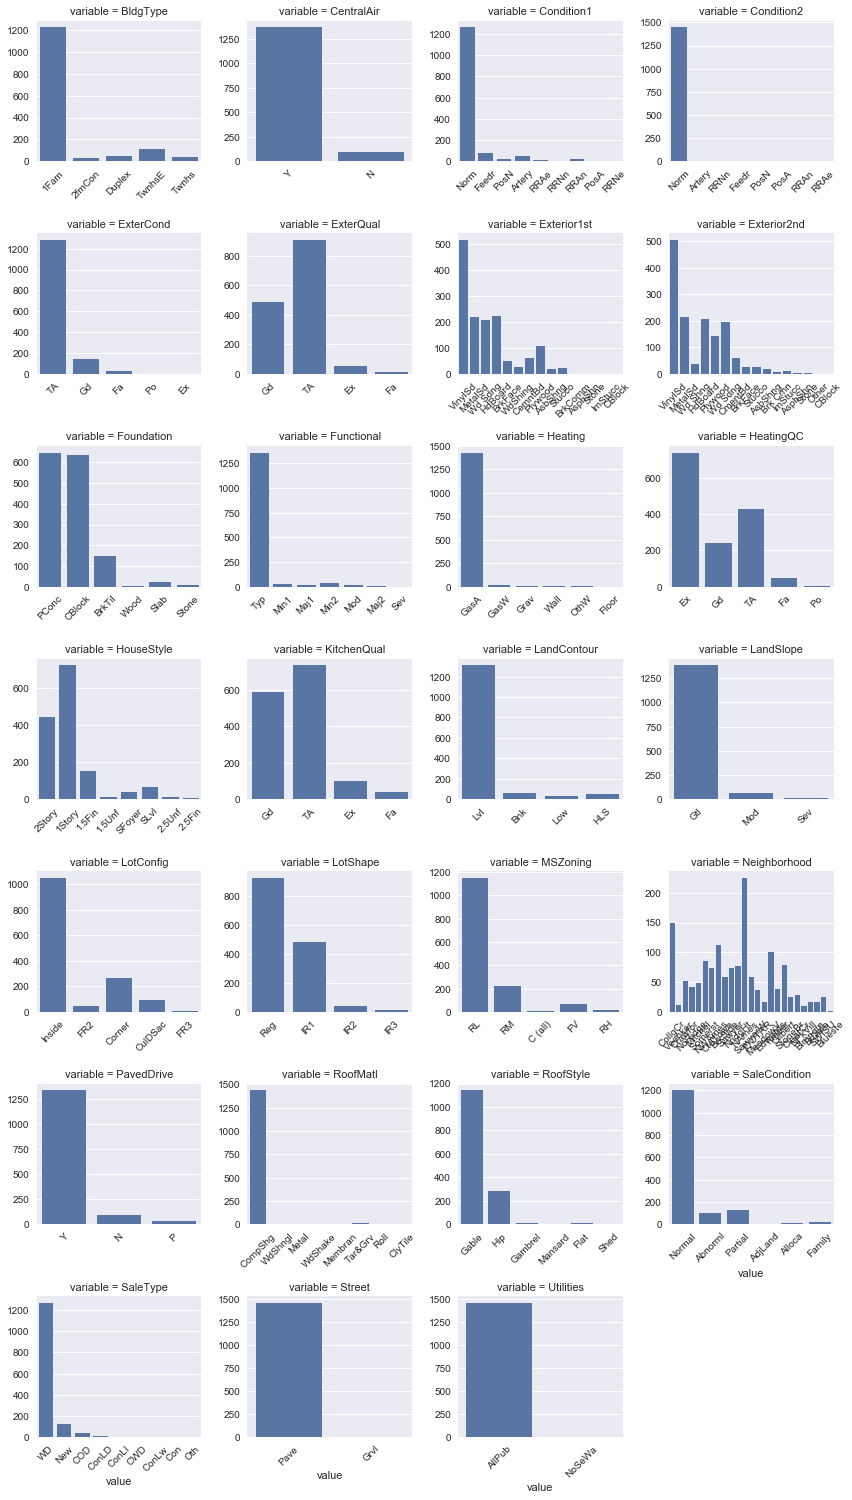

In [89]:
f = pd.melt(train_drop, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable',col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

## Numerical features

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


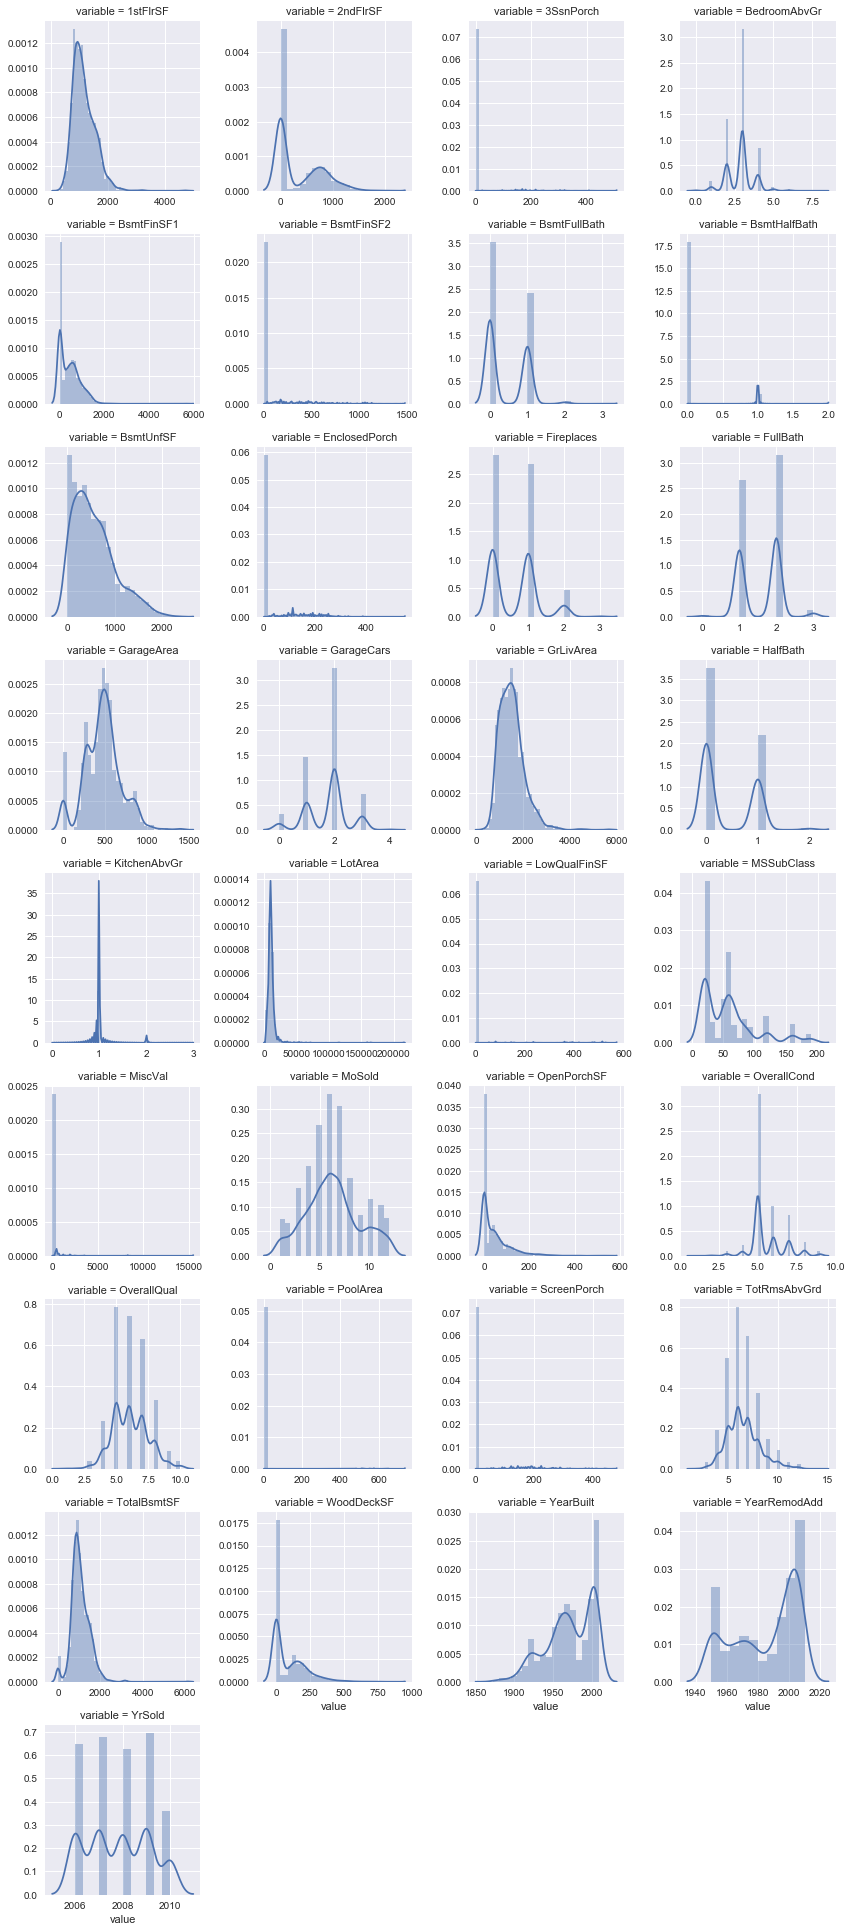

In [90]:
f = pd.melt(train_drop, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')
plt.show()

The oldest home was built in: 1872
The newest houme was built in 2010


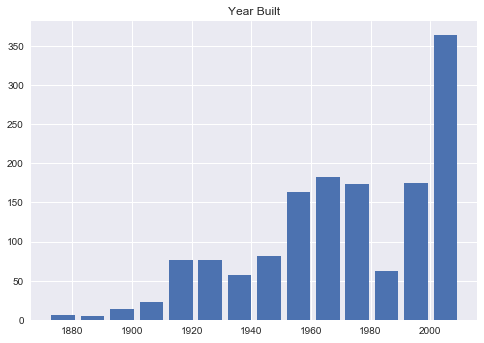

In [43]:
print('The oldest home was built in:', train_drop.YearBuilt.min())
print ('The newest houme was built in', train_drop.YearBuilt.max())
train_drop.YearBuilt.hist(bins=14, rwidth= 0.8)
plt.title('Year Built')
plt.show()

## Bivariate analysis

### Nominal features with Price
Since the goal is price prediction, I explore the corellation of price with some features. I choose Yearbuild and Neighborhood because these are logical choices.

Is interesting to notice the pattern of the real estate cycle here. Right before each market crash or recession, house prices increased significantly. After the crash, the price continued to decline for at least two years, stabilized until the dawn of the next market crash.

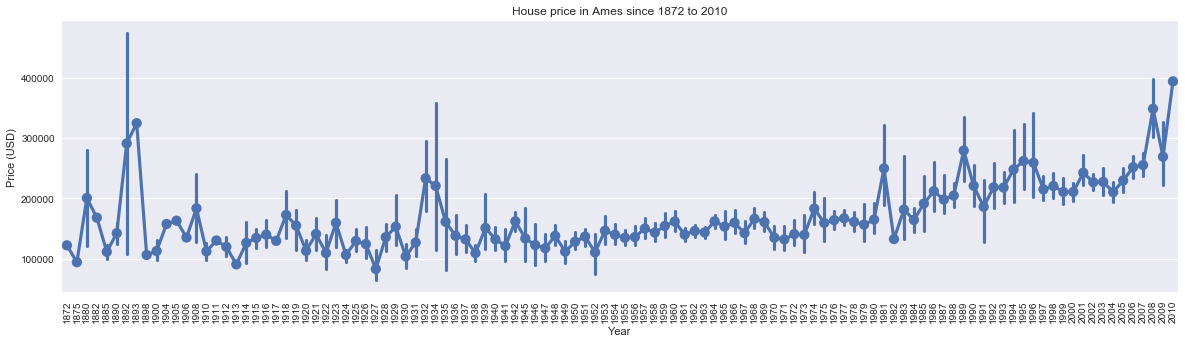

In [93]:
YearBuilt_meanSalePrice = \
    train_drop.groupby('YearBuilt')['SalePrice'].mean()

plt.figure(figsize=(20,5))
sns.pointplot(x = train_drop.YearBuilt.values, y = train_drop.SalePrice.values,
              order = YearBuilt_meanSalePrice.index)
plt.xticks(rotation=90)
plt.title("House price in Ames since 1872 to 2010")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.show()

Real estate investing is all about location. Among the neighborhood within Ames city limits, it looks like the Neighborhood where most houses locate in is Names. 

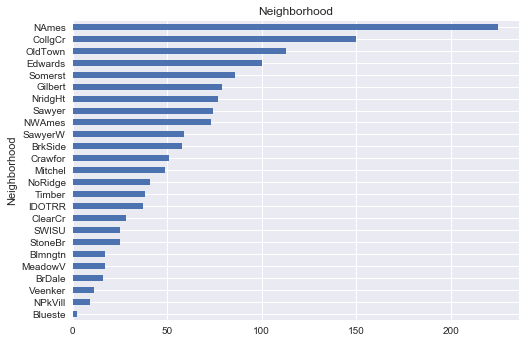

In [94]:
train_drop.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh')

plt.title('Neighborhood')
plt.show()

In [95]:
Neighborhood_meanSP = \
    train_drop.groupby('Neighborhood')['SalePrice'].mean()
 
Neighborhood_meanSalePrice = Neighborhood_meanSP.sort_values()
print (Neighborhood_meanSalePrice)

Neighborhood
MeadowV     98576
IDOTRR     100123
BrDale     104493
BrkSide    124834
Edwards    128219
OldTown    128225
Sawyer     136793
Blueste    137500
SWISU      142591
NPkVill    142694
NAmes      145847
Mitchel    156270
SawyerW    186555
NWAmes     189050
Gilbert    192854
Blmngtn    194870
CollgCr    197965
Crawfor    210624
ClearCr    212565
Somerst    225379
Veenker    238772
Timber     242247
StoneBr    310499
NridgHt    316270
NoRidge    335295
Name: SalePrice, dtype: int64


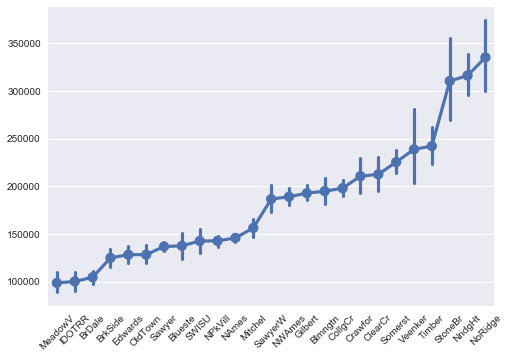

In [96]:
sns.pointplot(x = train_drop.Neighborhood.values, y = train_drop.SalePrice.values,
              order = Neighborhood_meanSalePrice.index)
plt.xticks(rotation=45)
plt.show()

### Numerical features with Price

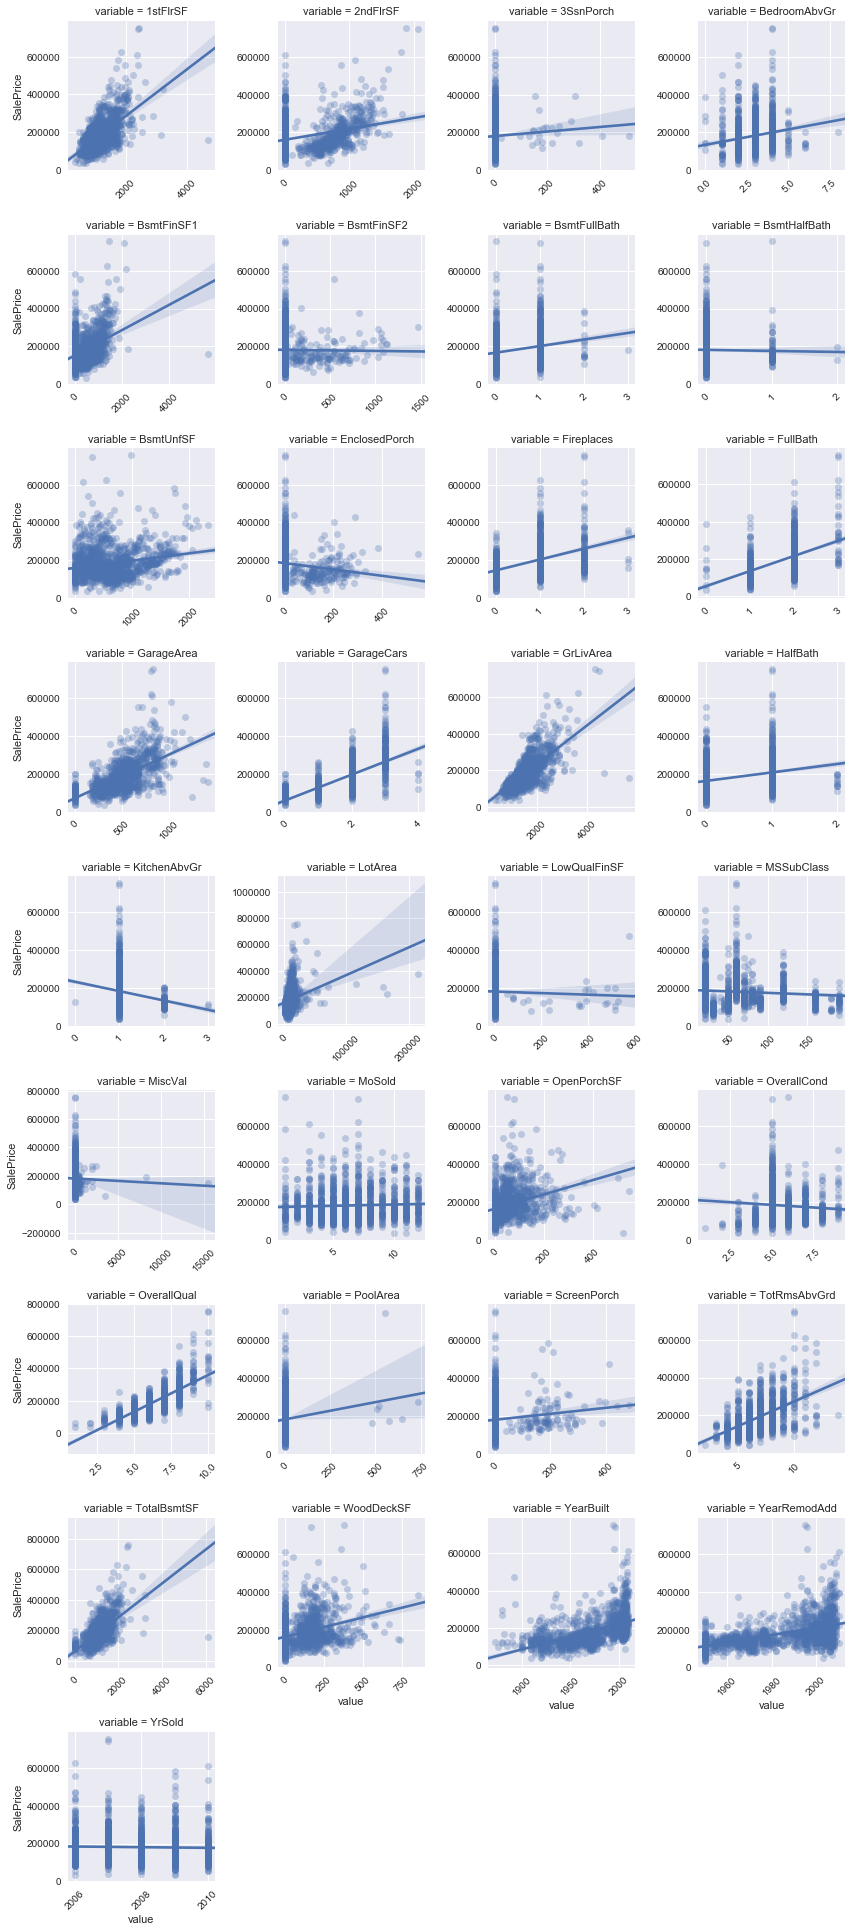

In [97]:
f = pd.melt(train_drop, id_vars=['SalePrice'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

SalePrice seems to strongly correllate with features such as OverallQual, TotalBsmtSF, GrLivArea, and TotRmsAbvGrd. This makes sense since bigger houses will be more expensive than smaller ones. I will replot these features against transformed Saleprice.

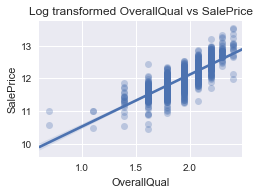

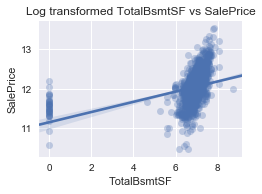

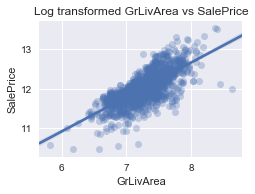

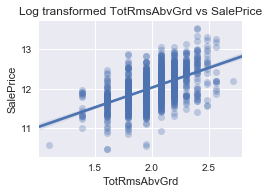

In [106]:
plt.subplot(221)
sns.regplot(np.log1p(train_drop.OverallQual), np.log1p(train_drop.SalePrice), scatter_kws={'alpha':0.3})
plt.title('Log transformed OverallQual vs SalePrice')
plt.show()

plt.subplot(222)
sns.regplot(np.log1p(train_drop.TotalBsmtSF), np.log1p(train_drop.SalePrice), scatter_kws={'alpha':0.3})
plt.title('Log transformed TotalBsmtSF vs SalePrice')
plt.show()

plt.subplot(223)
sns.regplot(np.log1p(train_drop.GrLivArea), np.log1p(train_drop.SalePrice), scatter_kws={'alpha':0.3})
plt.title('Log transformed GrLivArea vs SalePrice')
plt.show()

plt.subplot(223)
sns.regplot(np.log1p(train_drop.TotRmsAbvGrd), np.log1p(train_drop.SalePrice), scatter_kws={'alpha':0.3})
plt.title('Log transformed TotRmsAbvGrd vs SalePrice')
plt.show()

## Hypothesis
I hypothesize that certain features corellate best with sale price and that we can use these features to predict house price.